In [ ]:
!git clone https://github.com/Kimeudan05/boilerplate-medical-data-visualizer

Cloning into 'boilerplate-medical-data-visualizer'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 66 (delta 24), reused 8 (delta 8), pack-reused 31 (from 2)
Receiving objects: 100% (66/66), 824.37 KiB | 9.81 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [ ]:
%cd boilerplate-medical-data-visualizer

[Errno 2] No such file or directory: 'boilerplate-medical-data-visualizer'
/content/boilerplate-medical-data-visualizer/boilerplate-medical-data-visualizer


In [ ]:
!ls

examples  medical_data_visualizer.py  README.md		test_module.py
main.py   medical_examination.csv     requirements.txt


In [ ]:
# import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df  = pd.read_csv('medical_examination.csv')


In [ ]:
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# adding an overweight column (weihght (kg) / height(m) **2)
BMI = df['weight'] / (df['height'] / 100) ** 2
df['overweight'] = (BMI > 25).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [ ]:
for col in ['cholesterol','gluc']:
  df[col] =(df[col] >1 ).astype(int)

# OR
# for col in ['cholesterol', 'glucose']:
#     df.loc[df[col] == 1, col] = 0
#     df.loc[df[col] > 1, col] = 1

# OR

# # For 'cholesterol'
# df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
# df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1

# # For 'glucose'
# df.loc[df['gluc'] == 1, 'gluc'] = 0
# df.loc[df['gluc'] > 1, 'gluc'] = 1


In [ ]:
df[['cholesterol','gluc']]

,cholesterol,gluc
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
69995,0,0
69996,1,1
69997,1,0
69998,0,1


In [ ]:
df_cat = df.melt(id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


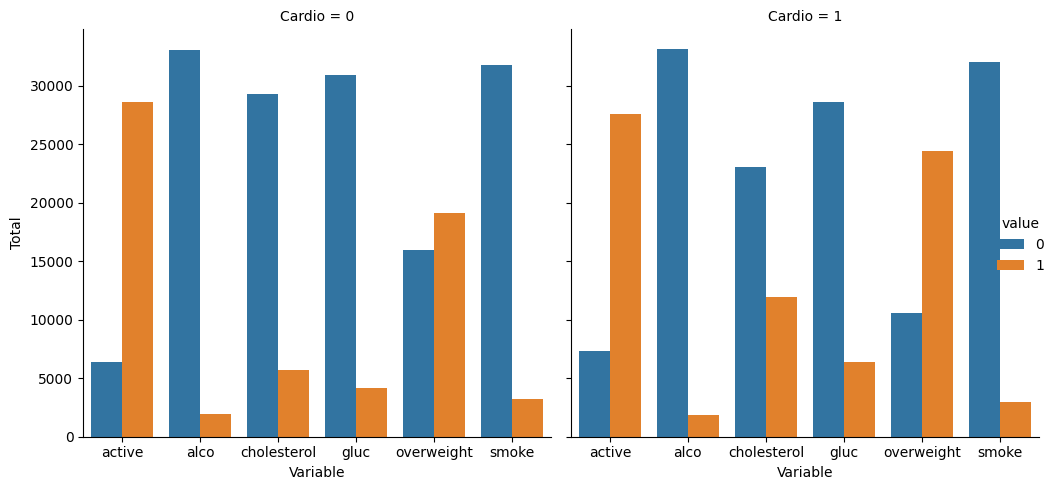

In [ ]:
catplot = sns.catplot(
    data=df_cat,
    x='variable',
    hue='value',
    col='cardio',
    kind='count'
)

catplot.set_axis_labels("Variable", "Total")
catplot.set_titles("Cardio = {col_name}")
plt.tight_layout()
plt.show()


In [ ]:
def draw_cat_plot():
    # 5: Melt
    df_cat = pd.melt(
        df,
        id_vars=['cardio'],
        value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
    )

    # 6: Group manually
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    # 7: Draw barplot with pre-counted data
    catplot = sns.catplot(
        data=df_cat,
        kind='bar',
        x='variable',
        y='total',
        hue='value',
        col='cardio'
    )

    # 8 get the figure
    fig = catplot.fig

    # 9 save
    fig.savefig('catplot.png')
    plt.close(fig)  # <-- Prevent duplicate display in Colab
    return fig


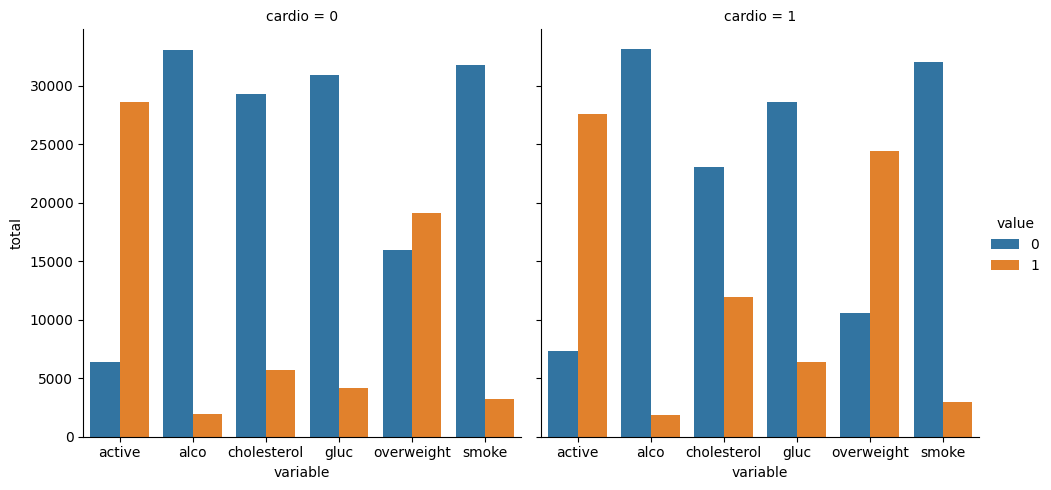

In [ ]:
draw_cat_plot()

In [ ]:
df['cardio'].value_counts()


,count
cardio,
0,35021
1,34979


In [ ]:
def tru():
  df_cat = df.melt(id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
  catplot = sns.catplot(
    data=df_cat,
    x='variable',
    hue='value',
    col='cardio',
    kind='count'
)
  return catplot

catplot.set_axis_labels("Variable", "Total")
catplot.set_titles("Cardio = {col_name}")
plt.tight_layout()
plt.show()



<Figure size 640x480 with 0 Axes>

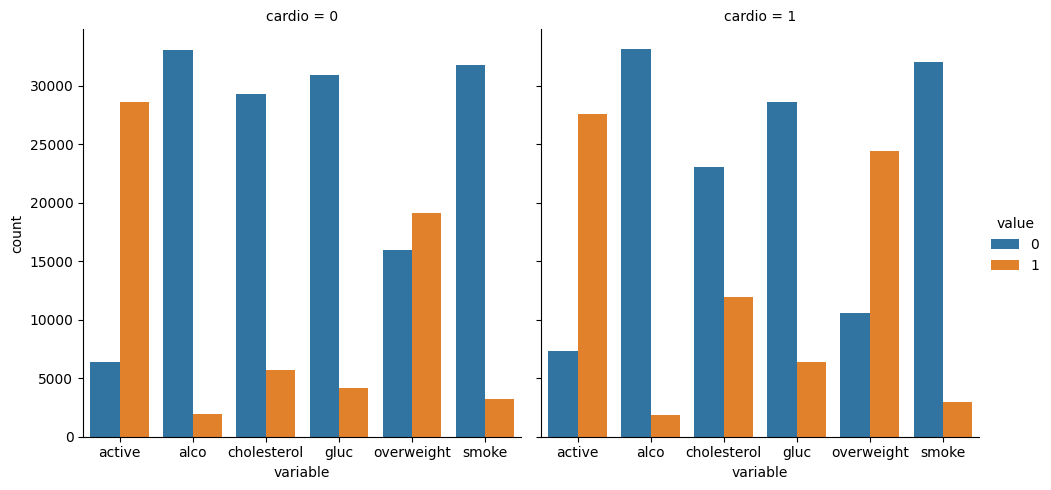

In [ ]:
tru()


In [ ]:
def draw_heat_map():
    # 11
    df_heat = df[
        (df['ap_lo'] <=df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
]


    # 12
    corr = df.corr(numeric_only=True)

    # 13
    mask = np.triu(np.ones_like(corr, dtype=bool))



    # 14 setup matplot lib figure
    fig, ax = plt.subplots(figsize=(12, 10))


    # 15 draw the heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', ax=ax,cbar_kws={"shrink":0.5})


    # 16 save and return
    fig.savefig('heatmap.png')
    plt.close(fig)  # <-- Prevent duplicate display in Colab
    return fig

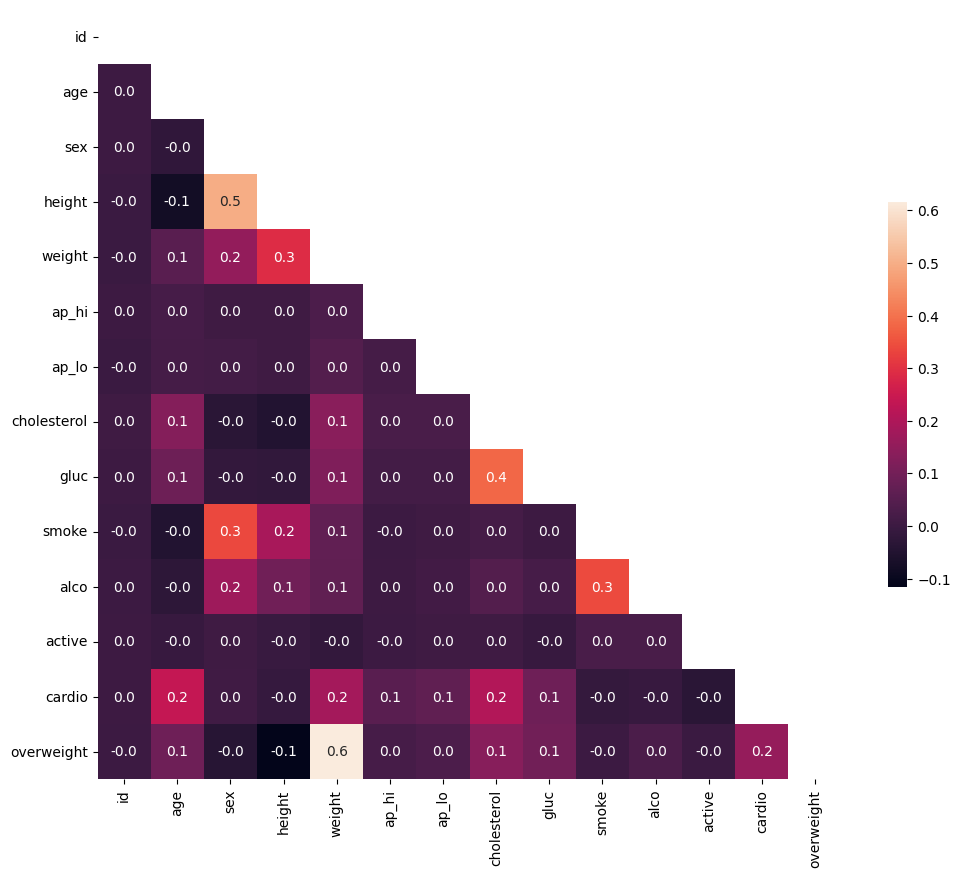

In [ ]:
draw_heat_map()

In [ ]:
df_heat = df[
        (df['ap_lo'] <=df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
]

df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


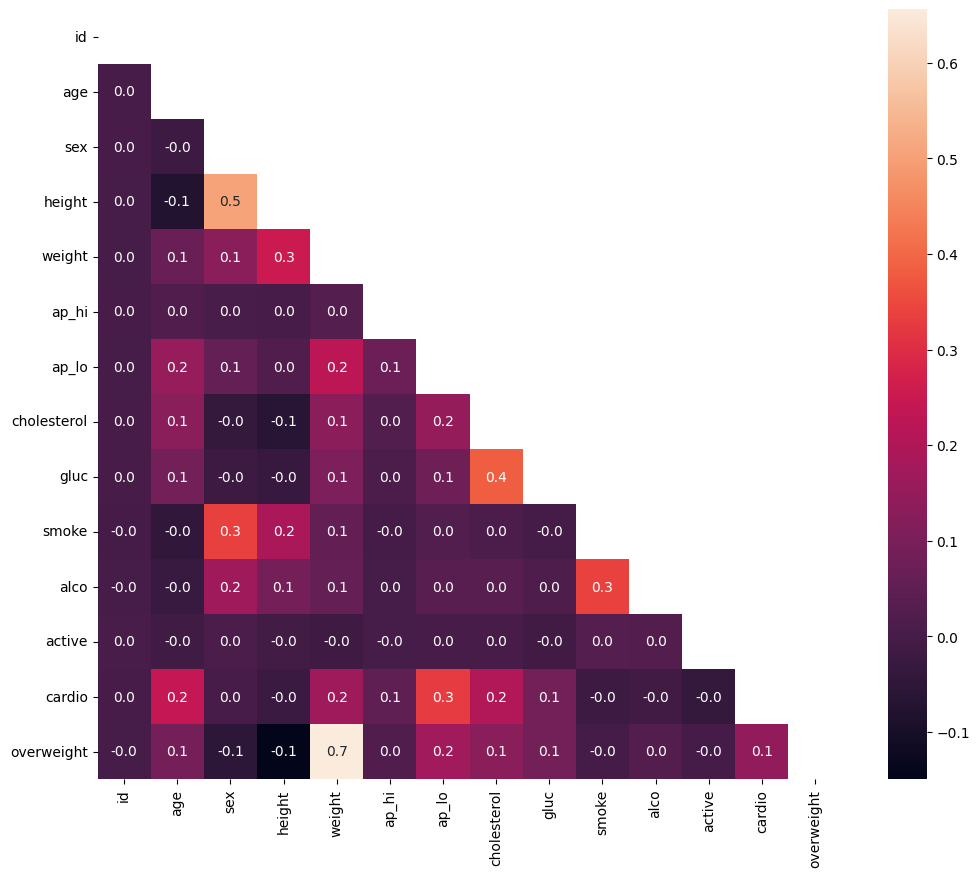

In [ ]:
corr = df_heat.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f')
plt.show()
fig.savefig('heatmap.png')